### 대한민국은 술을 얼마나 독하게 마시는 나라일까

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./python-data-analysis-master/data/drinks.csv"
drinks = pd.read_csv(path)
print(drinks.info())
drinks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 탐색과 시각화 
##### 피처간의 상관 관계 
1. 피처가 2개 일때 상관계수를 계산하는 단순 상관 분석 방법
2. 대상 피처가 여러 개일 때 상호 간의 연관성을 분석하는 다중 상관분석


#### 상관분석
> 두 변수 간의 선형적 관계를 상관계수로 표현하는것 (공분산의 개념을 포함)
> 공분산은 2개의 확률 변수에 대한 상관 정도로 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하는 경향을 수치로 나타낸 것(두 변수의 단위 크기에 영향을 받을수 있기때문에 -1~1사이의 값으로 변환 이를 상관계수라고 한다)

In [6]:
#단순 상관 분석
#beer_servings, wine_serving 두 피쳐간의 상관계수 계산
#pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법
corr = drinks[['beer_servings','wine_servings']].corr(method = 'pearson') #default : pearson
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [10]:
#4개의 피처에 corr()함수를 적용한 상관계수 행렬
cols = drinks.columns.tolist()[1:-1]
corr = drinks[cols].corr()
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


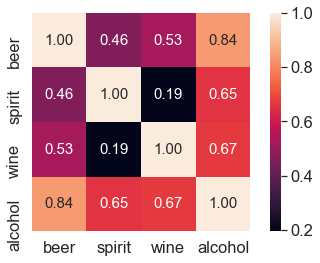

In [12]:
#시각화 하기 위해 heatmap or pairplot기법 사용
import seaborn as sns
import matplotlib.pyplot as plt
#corr 행렬 히트맵을 시각화 
cols_view = ['beer','spirit','wine','alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size':15},
                yticklabels= cols_view,
                xticklabels= cols_view)
plt.tight_layout()
plt.show()
#모든 연속형 피처의 상관분석

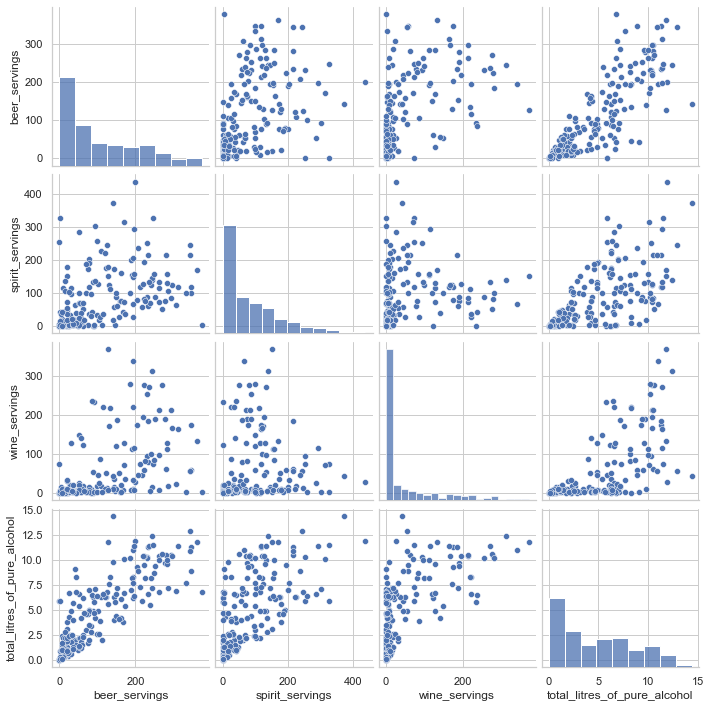

In [14]:
#시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[cols], height =2.5)
plt.show()

### 스무 고개로 개념적 탐색 분석하기

In [19]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [20]:
#결측 데이터를 처리 : null 값을 -> other ('OT') 로 변환
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


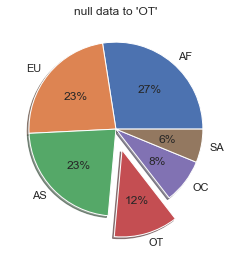

In [23]:
#OT가 차지하는 비율이 얼마나 되는지 pie chart로 확인
labels = drinks['continent'].value_counts().index.tolist()
fraces1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fraces1, explode = explode, labels = labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [26]:
drinks.shape

(193, 6)

### 대륙별 spirit_serving의 통계적 정보는 어느 정도 일까
##### agg() 함수를 사용
- apply()에 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
- agg()에 ['mean', 'min', 'max', 'sum']를 입력하는 것만으로 간단히 탐색이 가능하다

In [29]:
#대륙별 spirit_serving의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [34]:
#전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print(total_mean) ##
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean.mean())  ##
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

4.717098445595855
4.913502500048337
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [36]:
#평균 beer_servings가 가장 높은 대륙은 어디?
beer_continent = drinks.groupby('continent').beer_servings.mean()
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()

print(beer_continent)
#맥주 소비량이 가장높은대륙

EU


### 시각화

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]


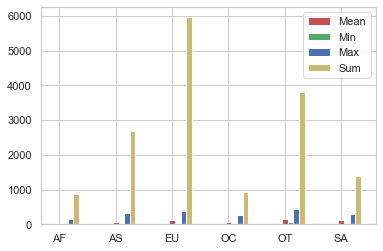

In [48]:
#대륙별 spirit_serving의 평균, 최소, 최대, 합계를 시각화합니다
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = 'r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label='Min')   
rects2 = plt.bar(index + bar_width*2, maxs, bar_width, color = 'b', label='Max')   
rects2 = plt.bar(index + bar_width*3, sums, bar_width, color = 'y', label='Sum')  

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
[3.00754716981132, 2.1704545454545454, 8.617777777777777, 3.3812500000000005, 5.995652173913044, 6.308333333333334]


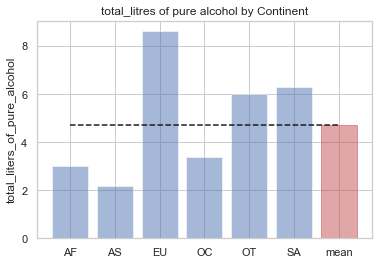

In [46]:
#대륙별 total_liters_of_pure_alchol을 시각화
continents = continent_mean.index.tolist()
print(continents)
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
print(alcohol)
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5) 
bar_list[len(continents) - 1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean],"k--")
plt.xticks(x_pos,continents)

plt.ylabel('total_liters_of_pure_alcohol')
plt.title('total_litres of pure alcohol by Continent')
plt.show()







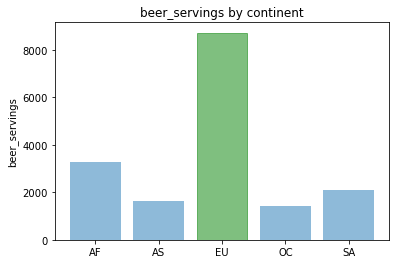

In [4]:
#대륙별 beer_serving를 시각화 합니다
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align= 'center', alpha = 0.5)
#빨간색 barplot
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by continent')
plt.show()

### 분석 대상간의 통계적 차이 검정
>분석 결과에 타당성을 부여하기위해 통계적으로 차이를 검정하는 과정
t-test를 통해 분석 대상 간에 통계적 차이를 검정하는 방법
##### t-test
>t-test란 두 집단 간의 평균의 차이에 대한 검정 방법: 모집단의 평균등과 같이 실제 정보를 모를 때 현재의 데이터 만으로 두 집단을 검정하는 방법
>검정 대상인 두 잡단의 데이터 개수가 비슷하면서 두 데이터가 정규 분포를 보이는 경우 신로도가 높은 검정

In [53]:
#아프리카와 유럽 간의 맥주 소비량 차이 검정
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],
                             europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                    europe['beer_servings'], equal_var=False)

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f' % tTestResult)
print('The t-statistic and p-value assuming equal variances is %.3f and %.3f' % tTestResultDiffVar)
# p-value의 값이 0.000이하 이므로 (두 집단의 평균이같다는 기각이된다 )
#통계적 차이 검정

The t-statistic and p-value assuming equal variances is -7.268 and 0.000
The t-statistic and p-value assuming equal variances is -7.144 and 0.000


t-test : 검정통계량, p-value 와 같이 출력된다
p-value : 가설이 얼마나 믿을만한 것인지를 나타내는 지표로 (귀무 가설이 맞다는 전제 하에 현재 나온 통계 값 이상이 나올 확률)
p-value가 낮으면 귀무가설이 일어날 확률이 너무 낮기 때문에 기각
값의 기준은 0.05 ~ 0.01를 기준으로 하며 이를 p-value(유의확률)이라고 한다 

In [55]:
#대한민국은 얼마나 술을 독하게 마시는 나라일까? 
#total_sevings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

#술 소비량 대비 알코올 비율 피쳐를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']

#순위 정보를 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending = 0)
country_with_rank.head()
# 새로운 피쳐 생성

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


['Gambia', 'Sierra Leone', 'Nigeria', 'Uganda', 'Rwanda', 'Tanzania', 'Burkina Faso', 'Central African Republic', "Cote d'Ivoire", 'Mali', 'Sudan', 'Malawi', 'Burundi', 'DR Congo', 'South Korea', 'Zimbabwe', 'Swaziland', 'Zambia', 'Ghana', 'Cameroon', 'Laos', 'Guinea-Bissau', 'Ethiopia', 'Eritrea', 'Belarus', 'Lesotho', 'Japan', 'Chad', 'Togo', 'Botswana', 'Kenya', 'Benin', 'South Africa', 'New Zealand', 'Finland', 'Lithuania', 'Saudi Arabia', 'Comoros', 'Estonia', 'Congo', 'United Kingdom', 'Ireland', 'Australia', 'Argentina', 'Slovakia', 'Latvia', 'Mozambique', 'Cabo Verde', 'Angola', 'Portugal', 'Sri Lanka', 'Ukraine', 'France', 'Guinea', 'Nepal', 'Egypt', 'Norway', 'St. Lucia', 'Dominica', 'Sweden', 'Jamaica', 'Spain', 'Singapore', 'Paraguay', 'Azerbaijan', 'Switzerland', 'Bahamas', 'Turkmenistan', 'Armenia', 'Vanuatu', 'Qatar', 'Cook Islands', 'Haiti', 'Sao Tome & Principe', 'Montenegro', 'Oman', 'Algeria', 'United Arab Emirates', 'Georgia', 'Guyana', 'Greece', 'Lebanon', 'China',

Text(24, 0.1093939393939394, 'South Korea: 13')

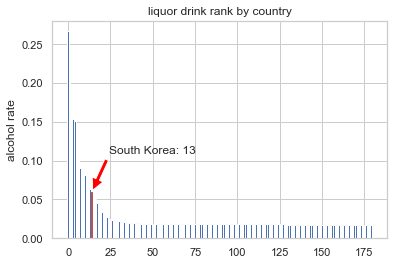

In [60]:
#국가별 순위 정보를 그래프로 시각화 
country_list = country_with_rank.country.tolist()
print(country_list)
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
#barplot
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')

korea_rank = country_list.index("South Korea")
print(korea_rank)
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
print(korea_alc_rate)
#한국을 따로 분리해서 barplot하나 더 그린거 
plt.annotate('South Korea: '+ str(korea_rank -1), #text
            xy = (korea_rank,korea_alc_rate), #막대
            xytext=(korea_rank+ 10, korea_alc_rate + 0.05), #text위치
            arrowprops = dict(facecolor='red', shrink=0.05)#막대모양)

In [ ]:
#미니퀴즈 2
#drinks['continent'].value_counts().index.tolist(): 대륙별 값들을 센 표에 인덱스를 리스트로 만든것
#drinks['continent'].value_counts().values.tolist():대륙별 값들을 센 표에 값들을 리스트로 만든것


#미니퀴즈 2-2
#faces : 원안의 값들labels: 원안의 이름 explode : 조각의 거리
    #정답: facs 표현되는 각 영역의 값  labels: 파이차트에서 각 영역의 이름을 의미

#미니퀴즈 1-3 (대륙별)
#1. result['mean'].tolist() : 평균 값 리스트
#1. result['min'].tolist() : 최소 값 리스트
#1. result['max'].tolist() : 최대 값 리스트
#1. result['sum'].tolist() : 합 값 리스트

#미니퀴즈 1-3-2
#align = 'center': 디자인이 담긴코드

# bar_list[continents.index("EU")].set_color('g')


## 연습문제

In [5]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./python-data-analysis-master/data/drinks.csv"
drinks = pd.read_csv(path)
drinks['continent'] = drinks['continent'].fillna('OT')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [12]:
#1. 대륙별 평균 wine_servings 탐색
drinks_wine_mean = drinks.groupby('continent').mean().sort_values('wine_servings',ascending=False)

#정답
result = drinks.groupby('continent').mean()['wine_servings']
df = result.to_frame().reset_index()
df

,continent,wine_servings
0,AF,16.264151
1,AS,9.068182
2,EU,142.222222
3,OC,35.625000
4,OT,24.521739
5,SA,62.416667


In [13]:
df = df.rename(columns = {'wine_servings':'wine_servings_cont_avg'})
df

,continent,wine_servings_cont_avg
0,AF,16.264151
1,AS,9.068182
2,EU,142.222222
3,OC,35.625000
4,OT,24.521739
5,SA,62.416667


In [14]:
drinks = pd.merge(drinks, df, on = 'continent', how= 'outer')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg_x,wine_servings_cont_avg_y
0,Afghanistan,0,0,0,0.0,AS,9.068182,9.068182
1,Bahrain,42,63,7,2.0,AS,9.068182,9.068182
2,Bangladesh,0,0,0,0.0,AS,9.068182,9.068182
3,Bhutan,23,0,0,0.4,AS,9.068182,9.068182
4,Brunei,31,2,1,0.6,AS,9.068182,9.068182
...,...,...,...,...,...,...,...,...
188,Samoa,105,18,24,2.6,OC,35.625000,35.625000
189,Solomon Islands,56,11,1,1.2,OC,35.625000,35.625000
190,Tonga,36,21,5,1.1,OC,35.625000,35.625000
191,Tuvalu,6,41,9,1.0,OC,35.625000,35.625000


In [11]:
drinks['wine_servings_cont_avg']= drinks.groupby('continent')['wine_servings'].transform(np.mean)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg
0,Afghanistan,0,0,0,0.0,AS,9.068182
1,Bahrain,42,63,7,2.0,AS,9.068182
2,Bangladesh,0,0,0,0.0,AS,9.068182
3,Bhutan,23,0,0,0.4,AS,9.068182
4,Brunei,31,2,1,0.6,AS,9.068182
...,...,...,...,...,...,...,...
188,Samoa,105,18,24,2.6,OC,35.625000
189,Solomon Islands,56,11,1,1.2,OC,35.625000
190,Tonga,36,21,5,1.1,OC,35.625000
191,Tuvalu,6,41,9,1.0,OC,35.625000


In [63]:
drinks_wine_mean

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193.777778,132.555556,142.222222,8.617778
SA,175.083333,114.750000,62.416667,6.308333
OC,89.687500,58.437500,35.625000,3.381250
OT,145.434783,165.739130,24.521739,5.995652
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455


In [16]:
#2. 국가별 모든 servings를 합을 계산한 total_servings
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
#정답 맞음

In [56]:
#3. 전체평균(drinks['total_servings'].mean()보다 적은 알코올을 마시는 대륙(drinks.groupby(continet).total_litres_of_pure_alcohol.mean())
#중 spirit를 가장 많이 마시는 국가 
drinks['total_servings'].mean()
drinks[drinks['total_servings'] <= drinks['total_servings'].mean()][['country','spirit_servings']].sort_values(by=['spirit_servings'],ascending=False)

#정답
#전체평균보다 적은 알코올을 마시는 대륙중
total_mean = drinks.total_litres_of_pure_alcohol.mean()
print("total_mean",total_mean)
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
print("continent_mean",continent_mean)
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
print("continent_under_mean",continent_under_mean)
#대류죽 spirit를 가장 많이 마시는 국가 
df_continent_under_mean = drinks[drinks.continent.isin(continent_under_mean)] #continent_under_mean이 있는거
#spirit가 가장큰
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
print('most_spirit_under_mean\n\n\n',most_spirit_under_mean)
#결과 출력
most_spirit_under_mean['country']

total_mean 4.7170984455958545
continent_mean continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
continent_under_mean ['AF', 'AS', 'OC']
most_spirit_under_mean


 country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
wine_servings_cont_avg_x                  9.068182
wine_servings_cont_avg_y                  9.068182
total_servings                                 646
Name: 30, dtype: object


'Russian Federation'

In [32]:
df_continent_under_mean['spirit_servings'].idxmax() #idxmax() 특정 value가 가장큰 데이터 index가 나온다

30

In [53]:
df_continent_under_mean.iloc[30,:]

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
wine_servings_cont_avg_x                  9.068182
wine_servings_cont_avg_y                  9.068182
total_servings                                 646
Name: 30, dtype: object

In [27]:
df_continent_under_mean['spirit_servings'].idxmax()

30

In [86]:
#4.술 소비량 대비 알코올 비율을 구해본다
#술 소비량 대비 알코올 비율 피쳐를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
#정답맞음

In [66]:
#정답
drinks['alcohol_rate'] =drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

#술 소비량 대비 알코올 비율 : 전체중 한국의 순위
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
print(drinks['alcohol_rate_rank'])
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

0      187.0
1      106.5
2      187.0
3      174.0
4      162.5
       ...  
188    154.5
189    162.5
190    142.5
191    106.5
192     70.5
Name: alcohol_rate_rank, Length: 193, dtype: float64


29    15.0
Name: alcohol_rate_rank, dtype: float64

In [76]:
#5.대륙별 술 소비량 대비 알코올 비율
continent_sum=drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] =continent_sum['total_litres_of_pure_alcohol']/continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
print(continent_sum)
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

drinks = pd.merge(drinks, continent_sum, on= 'continent', how = 'outer')
drinks

  continent  beer_servings  spirit_servings  wine_servings  \
0        AF           3258              866            862   
1        AS           1630             2677            399   
2        EU           8720             5965           6400   
3        OC           1435              935            570   
4        OT           3345             3812            564   
5        SA           2101             1377            749   

   total_litres_of_pure_alcohol  wine_servings_cont_avg_x  \
0                         159.4                     862.0   
1                          95.5                     399.0   
2                         387.8                    6400.0   
3                          54.1                     570.0   
4                         137.9                     564.0   
5                          75.7                     749.0   

   wine_servings_cont_avg_y  total_servings  alcohol_rate  alcohol_rate_rank  \
0                     862.0            4986      2.636258

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_servings_cont_avg_x,wine_servings_cont_avg_y,total_servings,alcohol_rate,alcohol_rate_rank,alcohol_rate_continent_x,alcohol_rate_continent_y,alcohol_rate_continent_x,alcohol_rate_continent_y
0,Afghanistan,0,0,0,0.0,AS,9.068182,9.068182,0,0.000000,187.0,0.020293,0.020293,0.020293,0.020293
1,Bahrain,42,63,7,2.0,AS,9.068182,9.068182,112,0.017857,106.5,0.020293,0.020293,0.020293,0.020293
2,Bangladesh,0,0,0,0.0,AS,9.068182,9.068182,0,0.000000,187.0,0.020293,0.020293,0.020293,0.020293
3,Bhutan,23,0,0,0.4,AS,9.068182,9.068182,23,0.017391,174.0,0.020293,0.020293,0.020293,0.020293
4,Brunei,31,2,1,0.6,AS,9.068182,9.068182,34,0.017647,162.5,0.020293,0.020293,0.020293,0.020293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,105,18,24,2.6,OC,35.625000,35.625000,147,0.017687,154.5,0.018401,0.018401,0.018401,0.018401
189,Solomon Islands,56,11,1,1.2,OC,35.625000,35.625000,68,0.017647,162.5,0.018401,0.018401,0.018401,0.018401
190,Tonga,36,21,5,1.1,OC,35.625000,35.625000,62,0.017742,142.5,0.018401,0.018401,0.018401,0.018401
191,Tuvalu,6,41,9,1.0,OC,35.625000,35.625000,56,0.017857,106.5,0.018401,0.018401,0.018401,0.018401


In [ ]:
#정답